# Лабораторная №1. Основы предобработки данных 

Используйте файл своей группы. <br>
Загрузите его в DataFrame и ответьте на вопросы, используя инстурменты из файла preprocessing.ipynb.


#### Воспросы
1. В какой шкале представлены все признаки в наборе?<br>
2. Укажите признак с наименьшей дисперсией.<br>
3. Среднее какого признака отличается для двух классов сильнее всего?<br>
4. В каком классе больше всего skilled работников?<br>
5. Есть ли в наборе признаки с выбросами? Какие?<br>
6. Сколько пропущенных значений в наборе?<br>
7. Попытайтесь заполнить пропущенные значения.<br>
8. Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.<br>
9. Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?<br>
10. Какой признак(и) имеет смысл стандартизировать? Почему?<br>
11. Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [2]:
path='credit_3530203_70101.csv'
credit_df = pd.read_csv(path, index_col=0)


# 1 Вопрос

In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 1 to 502
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         502 non-null    object 
 1   duration                502 non-null    float64
 2   credit_history          502 non-null    object 
 3   purpose                 502 non-null    object 
 4   credit_amount           502 non-null    float64
 5   savings_status          502 non-null    object 
 6   employment              502 non-null    object 
 7   installment_commitment  502 non-null    float64
 8   other_parties           502 non-null    object 
 9   property_magnitude      502 non-null    object 
 10  age                     502 non-null    float64
 11  other_payment_plans     502 non-null    object 
 12  housing                 502 non-null    object 
 13  existing_credits        502 non-null    float64
 14  job                     502 non-null    ob

In [4]:
credit_df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,foreign_worker,class
1,0<=X<200,18.0,existing paid,radio/tv,1301.0,<100,>=7,4.0,guarantor,real estate,32.0,none,own,1.0,unskilled resident,1.0,yes,good
2,>=200,6.0,critical/other existing credit,new car,1323.0,100<=X<500,>=7,2.0,none,car,28.0,none,own,2.0,skilled,2.0,yes,good
3,<0,24.0,existing paid,new car,3123.0,<100,<1,4.0,none,life insurance,27.0,none,own,1.0,skilled,1.0,yes,bad
4,<0,36.0,existing paid,used car,5493.0,<100,>=7,2.0,none,no known property,42.0,none,for free,1.0,skilled,2.0,yes,good
5,>=200,9.0,existing paid,radio/tv,1126.0,100<=X<500,>=7,2.0,none,real estate,49.0,none,own,1.0,skilled,1.0,yes,good


<ol>
<li><strong>checking_status(Статус существующего текущего счета)</strong>  Порядковая </li> 
<li><strong>duration(Продолжительность в месяцах)</strong>  Абсолютная </li> 
<li><strong>credit_history</strong>  Номинальная </li> 
<li><strong>purpose</strong>  Номинальная  </li>               
<li><strong>credit_amount</strong>  Абсолютная  </li>          
<li><strong>savings_status(Сберегательный счет / облигации)</strong>  Порядковая </li>            
<li><strong>employment(Настоящая занятость с)</strong>  Порядковая </li>            
<li><strong>installment_commitment(Размер рассрочки в процентах от располагаемого дохода)</strong>  Абсолютная </li> 
<li><strong>other_parties(Прочие должники / поручители)</strong>  Номинальная </li>         
<li><strong>property_magnitude(Собственность)</strong>  Номинальная </li>      
<li><strong>age</strong>  Абсолютная  </li>                 
<li><strong>other_payment_plans(Другие планы рассрочки)</strong>  Номинальная </li>    
<li><strong>housing</strong>  Номинальная </li>              
<li><strong>existing_credits</strong>  Абсолютная </li>      
<li><strong>job</strong>  Номинальная </li>                   
<li><strong>num_dependents(Количество неработующих в семье)</strong>  Абсолютная  </li>         
<li><strong>foreign_worker</strong>  Номинальная </li>           
<li><strong>class</strong>  Номинальная </li>   
</ol>

# 2 Вопрос

#### Укажите признак с наименьшей дисперсией: num_dependents

In [5]:
credit_df.std()

duration                    12.748
credit_amount             2822.553
installment_commitment       1.106
age                         11.274
existing_credits             0.586
num_dependents               0.374
dtype: float64

In [6]:
credit_df.var().idxmin()

'num_dependents'

# 3 Вопрос

#### Среднее какого признака отличается для двух классов сильнее всего: duration

In [7]:
credit_df.groupby('class').mean()

,duration,credit_amount,installment_commitment,age,existing_credits,num_dependents
class,,,,,,
bad,23.780,3682.220,3.067,33.317,1.354,1.152
good,18.799,3109.109,2.964,36.621,1.453,1.175


In [8]:
good_bad_mean = credit_df.groupby('class').mean()
good_bad_mean.max() / good_bad_mean.min()

duration                  1.265
credit_amount             1.184
installment_commitment    1.035
age                       1.099
existing_credits          1.073
num_dependents            1.019
dtype: float64

In [9]:
(good_bad_mean.max() / good_bad_mean.min()).idxmax()

'duration'

# 4 Вопрос
#### В каком классе больше всего skilled работников: в классе good

In [10]:
pd.crosstab(credit_df["class"], credit_df["job"])['skilled']

class
bad     107
good    213
Name: skilled, dtype: int64

# 5 Вопрос

#### Есть ли в наборе признаки с выбросами? Какие? Да: credit_amount, duration, age

In [11]:
normal_df = MinMaxScaler().fit_transform(credit_df[["duration", "credit_amount", "installment_commitment", "age", "existing_credits", "num_dependents"]])

<AxesSubplot:>

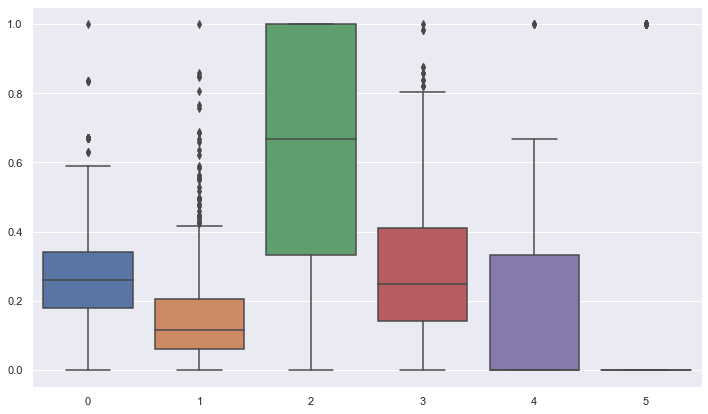

In [12]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=normal_df)

In [13]:
credit_df.describe()

,duration,credit_amount,installment_commitment,age,existing_credits,num_dependents
count,502.000,502.000,502.000,502.000,502.000,502.000
mean,20.426,3296.341,2.998,35.542,1.420,1.167
std,12.748,2822.553,1.106,11.274,0.586,0.374
min,-1.000,250.000,1.000,19.000,1.000,1.000
25%,12.000,1376.250,2.000,27.000,1.000,1.000
50%,18.000,2356.000,3.000,33.000,1.000,1.000
75%,24.000,3975.250,4.000,42.000,2.000,1.000
max,72.000,18424.000,4.000,75.000,4.000,2.000


In [14]:
credit_df.sort_values('credit_amount', ascending=False).head(4)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,foreign_worker,class
418,0<=X<200,48.0,no credits/all paid,other,18424.0,<100,1<=X<4,1.0,none,life insurance,32.0,bank,own,1.0,high qualif/self emp/mgmt,1.0,no,bad
321,<0,-1.0,existing paid,other,15857.0,<100,unemployed,2.0,co applicant,car,43.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,good
390,0<=X<200,48.0,existing paid,business,15672.0,<100,0,2.0,none,car,23.0,none,own,1.0,skilled,1.0,yes,bad
140,no checking,60.0,delayed previously,radio/tv,15653.0,<100,4<=X<7,2.0,none,car,21.0,none,own,2.0,skilled,1.0,yes,good


In [15]:
credit_df.sort_values('duration', ascending=False).head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,foreign_worker,class
180,0<=X<200,72.0,existing paid,radio/tv,5595.0,100<=X<500,1<=X<4,2.0,none,car,24.0,none,own,1.0,skilled,1.0,yes,bad
175,no checking,60.0,existing paid,new car,10366.0,<100,>=7,2.0,none,life insurance,42.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,good
119,0<=X<200,60.0,delayed previously,radio/tv,9157.0,no known savings,1<=X<4,2.0,none,no known property,27.0,none,for free,1.0,high qualif/self emp/mgmt,1.0,yes,good
217,0<=X<200,60.0,existing paid,new car,14027.0,<100,4<=X<7,4.0,none,no known property,27.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,bad
188,no checking,60.0,existing paid,new car,6527.0,no known savings,1<=X<4,4.0,none,no known property,34.0,none,for free,1.0,skilled,2.0,yes,good


In [16]:
credit_df.sort_values('existing_credits', ascending=False).head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,foreign_worker,class
310,no checking,12.0,critical/other existing credit,radio/tv,930.0,no known savings,>=7,4.0,none,real estate,65.0,none,own,4.0,skilled,1.0,yes,good
156,0<=X<200,36.0,delayed previously,new car,8086.0,100<=X<500,>=7,2.0,none,car,42.0,none,own,4.0,high qualif/self emp/mgmt,1.0,yes,bad
393,<0,27.0,critical/other existing credit,business,2442.0,<100,>=7,4.0,none,car,43.0,stores,own,4.0,high qualif/self emp/mgmt,2.0,yes,good
93,<0,12.0,critical/other existing credit,radio/tv,385.0,<100,4<=X<7,4.0,none,real estate,58.0,none,own,4.0,unskilled resident,1.0,yes,good
120,<0,6.0,critical/other existing credit,new car,3676.0,<100,1<=X<4,1.0,none,real estate,37.0,none,rent,3.0,skilled,2.0,yes,good


In [17]:
credit_df.sort_values('num_dependents', ascending=False).head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,foreign_worker,class
366,no checking,27.0,critical/other existing credit,furniture/equipment,4526.0,>=1000,<1,4.0,none,real estate,32.0,stores,own,2.0,unskilled resident,2.0,yes,good
340,no checking,4.0,existing paid,furniture/equipment,601.0,<100,<1,1.0,none,real estate,23.0,none,rent,1.0,unskilled resident,2.0,yes,good
63,<0,24.0,existing paid,used car,2964.0,no known savings,>=7,4.0,none,no known property,49.0,bank,for free,1.0,skilled,2.0,yes,good
392,no checking,28.0,all paid,used car,7824.0,no known savings,<1,3.0,guarantor,real estate,40.0,bank,rent,2.0,skilled,2.0,yes,good
325,<0,36.0,existing paid,furniture/equipment,2712.0,<100,>=7,2.0,none,life insurance,41.0,bank,own,1.0,skilled,2.0,yes,bad


# 6 Вопрос

#### Сколько пропущенных значений в наборе? 35

In [18]:
credit_df.describe()

,duration,credit_amount,installment_commitment,age,existing_credits,num_dependents
count,502.000,502.000,502.000,502.000,502.000,502.000
mean,20.426,3296.341,2.998,35.542,1.420,1.167
std,12.748,2822.553,1.106,11.274,0.586,0.374
min,-1.000,250.000,1.000,19.000,1.000,1.000
25%,12.000,1376.250,2.000,27.000,1.000,1.000
50%,18.000,2356.000,3.000,33.000,1.000,1.000
75%,24.000,3975.250,4.000,42.000,2.000,1.000
max,72.000,18424.000,4.000,75.000,4.000,2.000


In [19]:
for col in credit_df.columns:
    print()
    print(col,': ', credit_df[col].unique()[:15])


checking_status :  ['0<=X<200' '>=200' '<0' 'no checking']

duration :  [18.  6. 24. 36.  9. 10. 15. 39. 12. -1. 48. 26.  4. 21. 30.]

credit_history :  ['existing paid' 'critical/other existing credit' 'all paid'
 'delayed previously' 'no credits/all paid']

purpose :  ['radio/tv' 'new car' 'used car' 'business' 'furniture/equipment'
 'repairs' 'education' 'retraining' 'domestic appliance' 'other']

credit_amount :  [1301. 1323. 3123. 5493. 1126. 1216. 1207. 1309. 2360. 6850. 1413. 8588.
  759. 4686. 2687.]

savings_status :  ['<100' '100<=X<500' 'no known savings' '500<=X<1000' '>=1000']

employment :  ['>=7' '<1' '1<=X<4' 'unemployed' '4<=X<7' '0']

installment_commitment :  [4. 2. 1. 3.]

other_parties :  ['guarantor' 'none' 'co applicant']

property_magnitude :  ['real estate' 'car' 'life insurance' 'no known property']

age :  [32. 28. 27. 42. 49. 38. 24. 36. 34. 45. 26. 20. 54. 37. 40.]

other_payment_plans :  ['none' 'bank' 'stores']

housing :  ['own' 'for free' 'rent']

exis

In [20]:
(credit_df['duration'] < 0).sum()

27

In [21]:
(credit_df["employment"] == "0").sum()

8

In [22]:
(credit_df['duration'] < 0).sum() \
+ (credit_df["employment"] == "0").sum()

35

#### Заменим пока пропущенные значения на NaN и посмотрим графики вопросов 8 и 9

In [23]:
credit_df.loc[:, ['duration']] = credit_df['duration'].replace(-1, np.NaN)

In [24]:
credit_df.loc[:, ['employment']] = credit_df['employment'].replace("0", np.NaN)

In [25]:
credit_df.isnull().sum()

checking_status            0
duration                  27
credit_history             0
purpose                    0
credit_amount              0
savings_status             0
employment                 8
installment_commitment     0
other_parties              0
property_magnitude         0
age                        0
other_payment_plans        0
housing                    0
existing_credits           0
job                        0
num_dependents             0
foreign_worker             0
class                      0
dtype: int64

In [26]:
credit_df.std()

duration                    12.006
credit_amount             2822.553
installment_commitment       1.106
age                         11.274
existing_credits             0.586
num_dependents               0.374
dtype: float64

# 8 Вопрос
#### Как минимум для одного признака каждого типа постройте диаграмму, которая может помочь его исследовать.


<AxesSubplot:xlabel='foreign_worker', ylabel='count'>

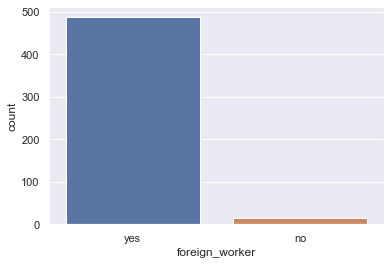

In [27]:
# Номинальный признак (бинарный)
sns.countplot(x='foreign_worker', data=credit_df)
# Можно сделать предположение, что чаще берут кредиты иностранцы
# Может быть не стоит рассматривать в дальнейшем этот признак

<AxesSubplot:xlabel='employment', ylabel='count'>

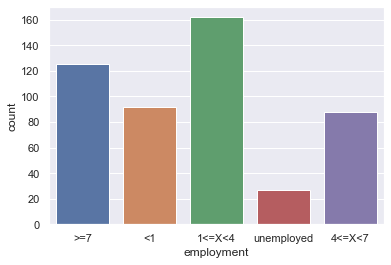

In [28]:
# Порядковый признак
sns.countplot(x='employment', data=credit_df)
# Можно сделать предположение, что чаще берут кредит люди со стажем работы от 1 до 4 лет
# Люди без работы особо и не пытаются

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

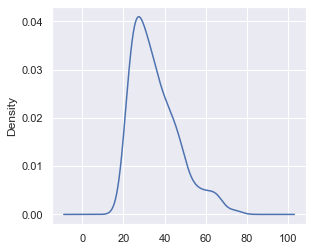

In [29]:
credit_df['age'].plot(kind='density', layout=(1, 2), subplots=True, figsize=(10, 4), sharex=False)
# Можно сделать предположение, что кредит чаще  берется в промежутке от 25 до 35
# Возможно стоит обратить внимание на количесвто заявок от людей в возрасте 60-65 (пенсия в Германии с 67)

# 9 Вопрос
#### Проанализируйте взаимосвязи признаков с помощью scatter-plot матрицы и тепловой карты корреляций. Какие выводы можно сделать?

In [30]:
ratio_features = ["duration", "credit_amount", "installment_commitment", "age", "existing_credits", "num_dependents"]

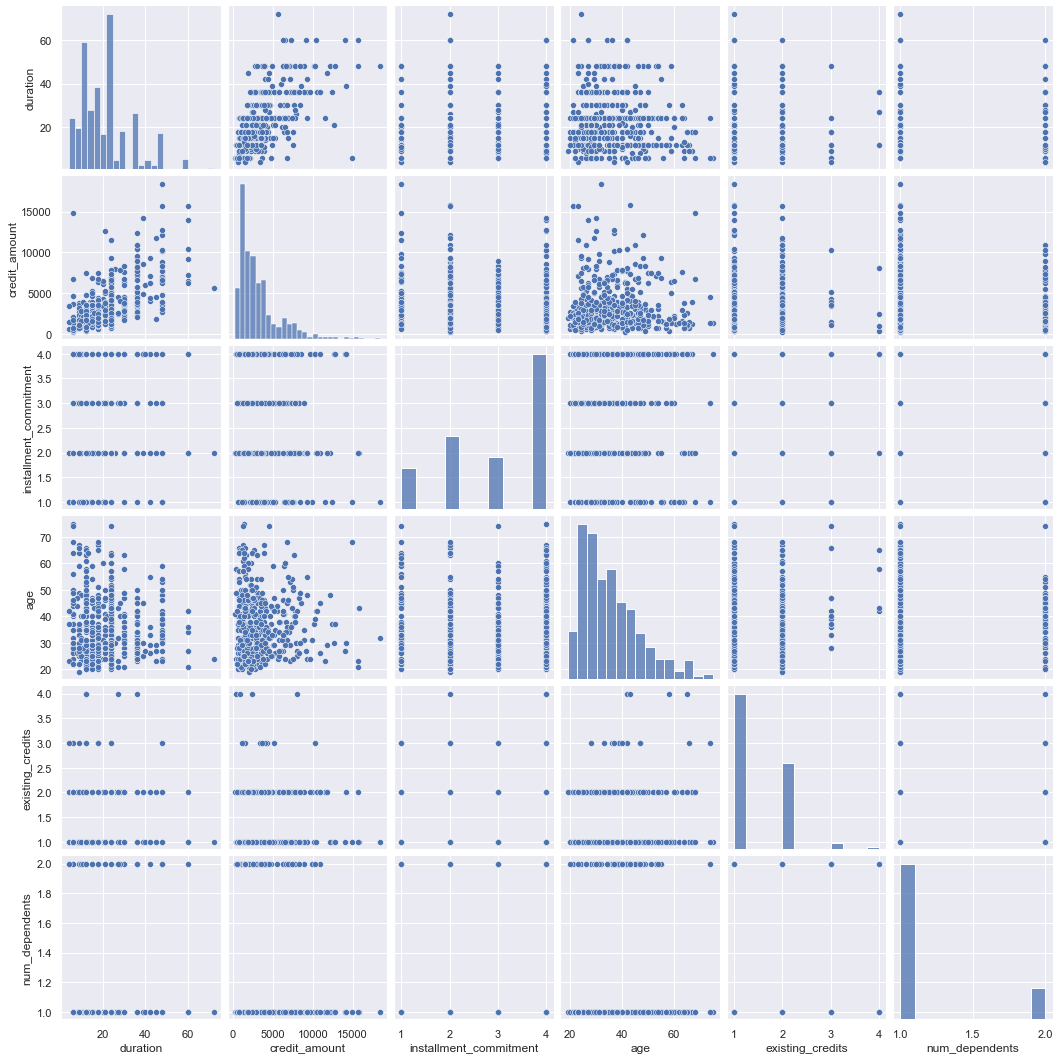

In [31]:
sns.pairplot(credit_df[ratio_features])

# Можно заметить прямую линейную зависимость между credit_amount и duration

<AxesSubplot:>

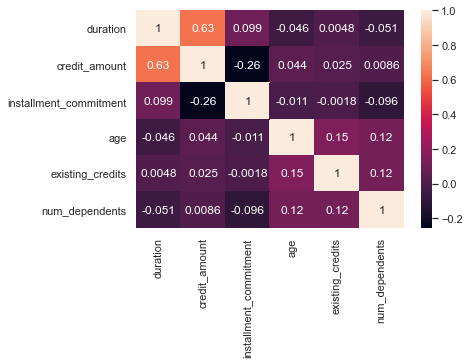

In [32]:
corr_matrix = credit_df[ratio_features].corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

# Теперь точно видим, что есть "умеренная" прямая линейная зависимость между credit_amount и duration.
# Также возможно есть "слабая" обратная линейная зависимость между installment_commitment и credit_amount

# 7 Вопрос
#### Попытайтесь заполнить пропущенные значения.

In [33]:
credit_df.isnull().sum()

checking_status            0
duration                  27
credit_history             0
purpose                    0
credit_amount              0
savings_status             0
employment                 8
installment_commitment     0
other_parties              0
property_magnitude         0
age                        0
other_payment_plans        0
housing                    0
existing_credits           0
job                        0
num_dependents             0
foreign_worker             0
class                      0
dtype: int64

In [34]:
credit_df['duration'].fillna(credit_df['duration'].mean(), inplace=True)
credit_df['duration'].isnull().sum()

0

In [35]:
credit_df['employment'].mode()[0]

'1<=X<4'

<AxesSubplot:xlabel='employment', ylabel='count'>

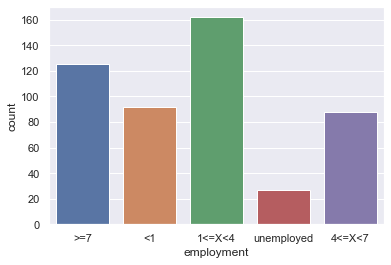

In [36]:
sns.countplot(x='employment', data=credit_df)

In [37]:
credit_df['employment'].fillna(credit_df['employment'].mode()[0], inplace=True)
credit_df['employment'].isnull().sum()

0

In [38]:
credit_df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
other_parties             0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
foreign_worker            0
class                     0
dtype: int64

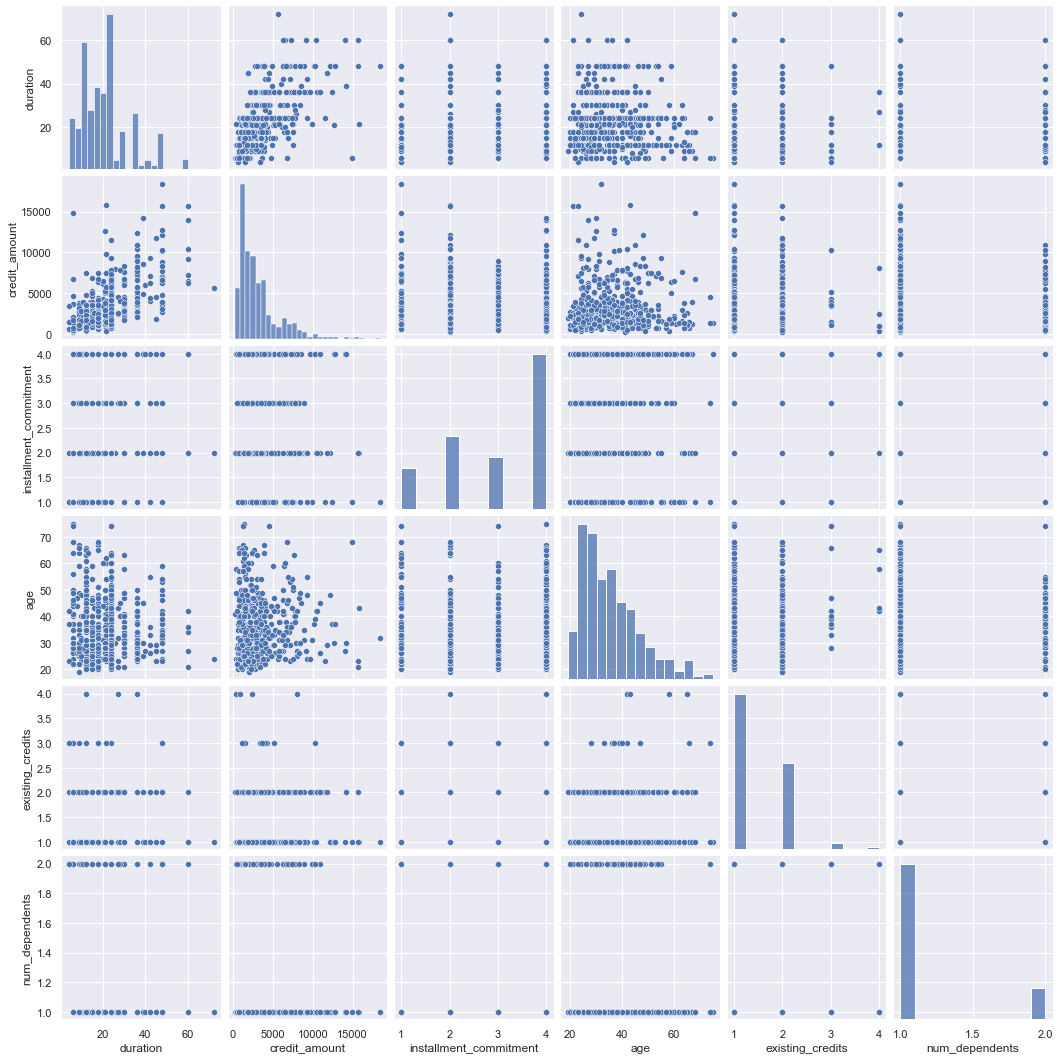

In [39]:
sns.pairplot(credit_df[ratio_features]) 

<AxesSubplot:>

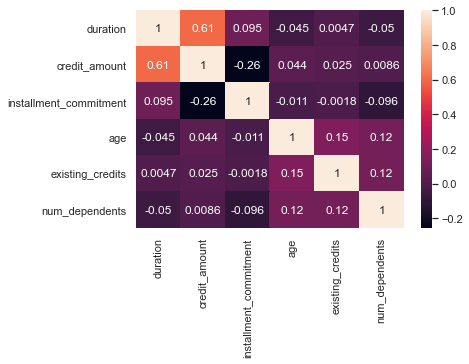

In [40]:
corr_matrix = credit_df[ratio_features].corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

# Вопрос 10


#### Какой признак(и) имеет смысл стандартизировать? Почему?

<AxesSubplot:>

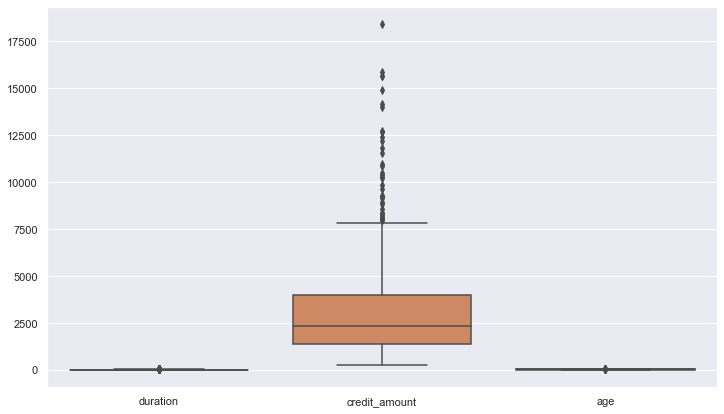

In [41]:
new_df = credit_df[["duration", "credit_amount", "age"]]
plt.subplots(figsize=(12,7))
sns.boxplot(data=new_df)

# У признаков:  ["duration", "credit_amount", "age"] большая шкала возможных значений, поэтому эти признаки
# могут внести больший вклад при построении некоторых моделей и ухудшить качество модели

In [44]:
duration_df = StandardScaler().fit_transform(credit_df[["duration", "credit_amount", "age"]])
scaled_df = pd.DataFrame(duration_df, columns=["duration", "credit_amount", "age"])

<AxesSubplot:>

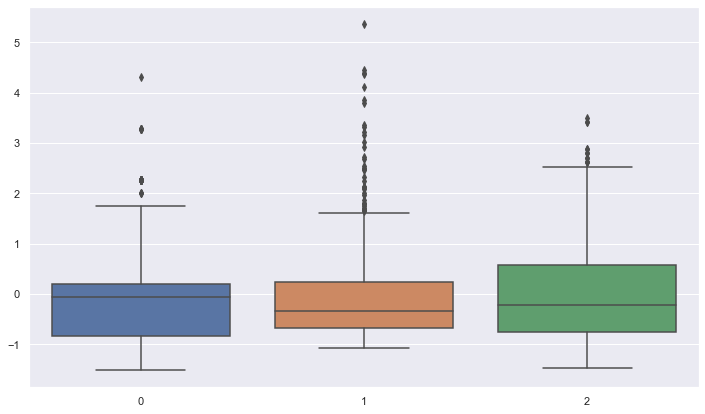

In [45]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=duration_df)

<AxesSubplot:xlabel='duration', ylabel='Density'>

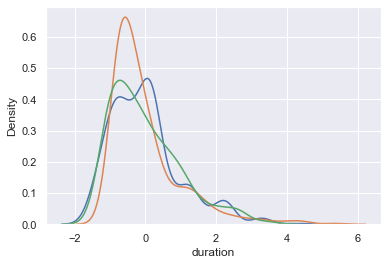

In [47]:
sns.kdeplot(scaled_df["duration"])
sns.kdeplot(scaled_df["credit_amount"])
sns.kdeplot(scaled_df["age"])

# Вопрос 11

#### Придумайте 1 новый признак, попытайтесь объяснить, почему он информативный.<br>

Семейное положение

Можно рассматривать семейно положение человека как оценку его надежности и постоянства. Скорее всего, человек, обремененный семьей, в случае потери работы
будет с большим усердием искать новую. Хотя с каждым годом наблюдается рост числа разводов и увеличение числа пар, не регистрирующих брак официально.
Возможно, данный признак будет становиться все менее информативным со временем.